# SVD on Movielens Dataset

## Preparation

In [1]:
%pip install -r ../requirements.txt


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import sys, os
sys.path.append(os.path.abspath("../"))

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from core.utils import load_algo, load_cv, load_gscv, CV_FOLDS
from api.model import recommend_top_k

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

## Model Tuning

In [19]:
%run ../core/gs_svd_factors.py

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:  2.2min finished


In [20]:
gs = load_gscv("gs_svd_factors")

gs_df = pd.DataFrame(gs.cv_results)

abbr_gs_df = gs_df[["rank_test_rmse"]]

abbr_gs_df.sort_values(by="rank_test_rmse", ascending=True, inplace=False)[0:10]

,split0_test_rmse,split1_test_rmse,split2_test_rmse,split3_test_rmse,split4_test_rmse,split5_test_rmse,split6_test_rmse,split7_test_rmse,split8_test_rmse,split9_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,param_n_factors,param_n_epochs,param_reg_all
51,0.860496,0.874899,0.861833,0.850614,0.868768,0.846176,0.867055,0.862148,0.854020,0.850057,0.859607,0.008770,1,17,30,0.04
44,0.863742,0.874253,0.862137,0.849728,0.865767,0.846468,0.868942,0.860847,0.855301,0.850396,0.859758,0.008591,2,16,30,0.04
37,0.861748,0.877086,0.861482,0.851414,0.869263,0.842634,0.866151,0.866336,0.853969,0.849909,0.859999,0.009871,3,15,30,0.04
36,0.859118,0.874995,0.858501,0.850105,0.864644,0.844926,0.874940,0.863821,0.859368,0.851422,0.860184,0.009413,4,15,30,0.03
57,0.859250,0.877380,0.863553,0.849112,0.865577,0.844772,0.871481,0.866502,0.851291,0.853193,0.860211,0.009963,5,18,30,0.03
59,0.862037,0.875878,0.862878,0.848752,0.866580,0.843068,0.871121,0.864582,0.855646,0.852259,0.860280,0.009715,6,18,30,0.05
58,0.861541,0.874270,0.859096,0.851715,0.868952,0.845252,0.867673,0.864958,0.856932,0.852591,0.860298,0.008485,7,18,30,0.04
16,0.864723,0.876731,0.860564,0.850014,0.866778,0.845046,0.869278,0.862847,0.857023,0.850525,0.860353,0.009292,8,12,30,0.04
64,0.860337,0.876085,0.861290,0.852824,0.867439,0.844393,0.869282,0.863481,0.856892,0.851625,0.860365,0.008875,9,19,30,0.03
23,0.862082,0.875533,0.859407,0.854930,0.866736,0.845761,0.870272,0.861916,0.855357,0.852988,0.860498,0.008350,10,13,30,0.04


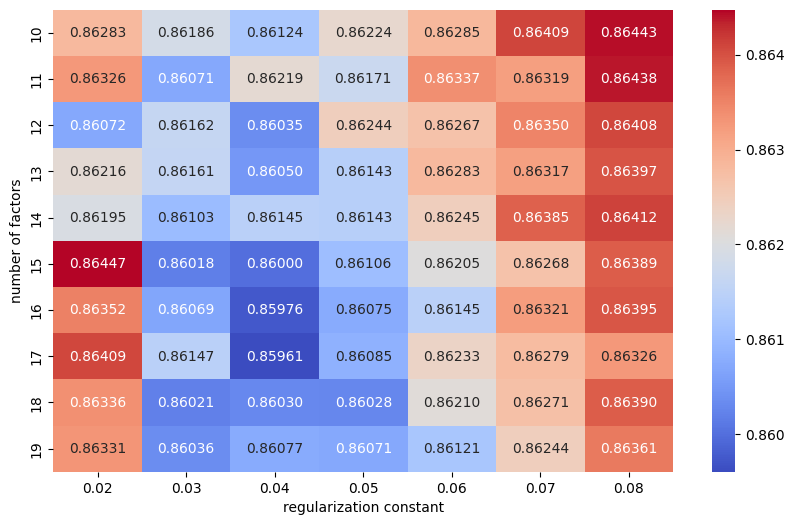

In [25]:
heatmap_data = gs_df.pivot(index="param_n_factors", columns="param_reg_all", values="mean_test_rmse")

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".5f", cmap="coolwarm")
plt.title("")
plt.xlabel("regularization constant")
plt.ylabel("number of factors")
plt.show()

## Model Training

In [22]:
%run ../core/train_svd.py

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29


## Model Testing

In [23]:
%run ../core/test_svd.py

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20


In [24]:
cv_dict = load_cv("cv_svd")

cv_df = pd.DataFrame(cv_dict, index=(f"Fold {k}" for k in range(1, CV_FOLDS + 1)))

cv_df.loc["Mean"] = cv_df.mean(axis=0)
cv_df.loc["Stdev"] = cv_df.std(axis=0)

cv_df.drop(columns=[]).transpose()

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Fold 7,Fold 8,Fold 9,Fold 10,Mean,Stdev
test_rmse,0.863199,0.874037,0.860961,0.849101,0.865812,0.846545,0.872425,0.862720,0.855405,0.854670,0.860488,0.008664
test_mae,0.661363,0.670333,0.660047,0.653402,0.664457,0.648454,0.667066,0.657413,0.659669,0.656169,0.659837,0.006136
fit_time,0.787186,0.800840,0.852050,0.892377,0.908851,0.883084,0.797397,0.741663,0.687322,0.570556,0.792133,0.099142
test_time,0.136754,0.135790,0.123677,0.127890,0.126040,0.114605,0.095811,0.064783,0.063246,0.058103,0.104670,0.030013
test_prec,0.707608,0.701587,0.695725,0.695331,0.696397,0.696414,0.701914,0.697594,0.680383,0.699193,0.697214,0.006661
test_rec,0.655596,0.653299,0.652558,0.655367,0.653024,0.652168,0.651134,0.644247,0.635516,0.654679,0.650759,0.005930
test_f1,0.649850,0.645135,0.641991,0.644152,0.642873,0.643500,0.642430,0.638657,0.627820,0.644043,0.642045,0.005438
